# Decision Tree

Usarei esse algoritmo de classificação para construir um modelo a partir dos dados históricos dos pacientes e sua resposta a diferentes medicamentos. Em seguida, usarei a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

In [1]:
# Importando as bibliotecas necessárias.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Entendendo os dados

Imagine que você é um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, Medicamento A, Medicamento B, Medicamento C, Medicamento X e Y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. As características deste conjunto de dados são Idade, Sexo, Pressão Arterial e Colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

Dataset disponível em: https://github.com/Mr-MeerMoazzam/Machine-Learning/blob/main/drugdata.csv

In [2]:
# Carregando e visualizando os dados.

data = pd.read_csv("drugdata.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
# Obtendo informações sobre o dataset.
data.shape

(200, 6)

In [4]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
data["Age"].unique().shape

(57,)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

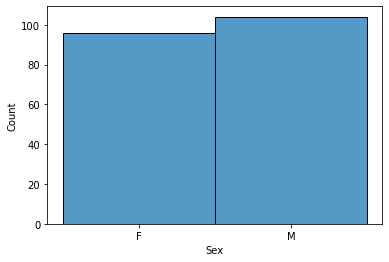

In [7]:
sns.histplot(data = data, x = "Sex")

<AxesSubplot:xlabel='Drug', ylabel='Count'>

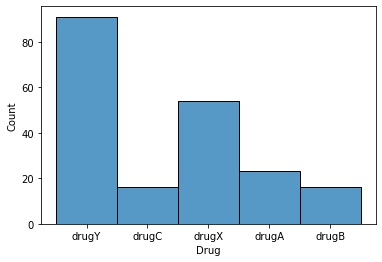

In [8]:
sns.histplot(data = data, x = "Drug")

In [9]:
# Dividindo o dataset em treino.
# Algumas colunas são do tipo Object, para tratar isso utilizarei o comando pandas.get_dummies().

data2 = pd.get_dummies(data[["Age" , "Sex", "BP", "Cholesterol", "Na_to_K"]])

In [10]:
data2

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1,0,1,0,0,1,0
1,47,13.093,0,1,0,1,0,1,0
2,47,10.114,0,1,0,1,0,1,0
3,28,7.798,1,0,0,0,1,1,0
4,61,18.043,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,0,1,0,1,0
196,16,12.006,0,1,0,1,0,1,0
197,52,9.894,0,1,0,0,1,1,0
198,23,14.020,0,1,0,0,1,0,1


In [11]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [15]:
X = data2[["Age", "Sex_F", "Sex_M", "BP_HIGH", "BP_LOW", "BP_NORMAL", "Cholesterol_HIGH", "Cholesterol_NORMAL", "Na_to_K"]]
y = data.Drug

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 9)
(60, 9)
(140,)
(60,)


### Criando a Árvore de decisão

In [18]:
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [20]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predição

In [22]:
y_pred = decision_tree.predict(X_test)

### Avaliação

In [23]:
print("Acurácia da árvore de decisão", metrics.accuracy_score(y_test, y_pred))

Acurácia da árvore de decisão 1.0


### Conclusão

A pontuação de classificação de precisão calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve
corresponder exatamente ao conjunto de rótulos correspondente em y_true.

Na classificação multirótulo, a função retorna a precisão do subconjunto. Se todo o conjunto de rótulos previstos para uma 
amostra corresponder estritamente ao conjunto verdadeiro de rótulos, a precisão do subconjunto será 1,0; caso contrário, é 0,0.

### Visualizando

[Text(418.5, 391.392, 'X[8] <= 14.829\nentropy = 1.959\nsamples = 140\nvalue = [19, 7, 14, 36, 64]'),
 Text(334.8, 304.416, 'X[3] <= 0.5\nentropy = 1.777\nsamples = 76\nvalue = [19, 7, 14, 36, 0]'),
 Text(167.4, 217.44, 'X[4] <= 0.5\nentropy = 0.855\nsamples = 50\nvalue = [0, 0, 14, 36, 0]'),
 Text(83.7, 130.464, 'entropy = 0.0\nsamples = 24\nvalue = [0, 0, 0, 24, 0]'),
 Text(251.10000000000002, 130.464, 'X[7] <= 0.5\nentropy = 0.996\nsamples = 26\nvalue = [0, 0, 14, 12, 0]'),
 Text(167.4, 43.488, 'entropy = 0.0\nsamples = 14\nvalue = [0, 0, 14, 0, 0]'),
 Text(334.8, 43.488, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 0, 12, 0]'),
 Text(502.20000000000005, 217.44, 'X[0] <= 50.5\nentropy = 0.84\nsamples = 26\nvalue = [19, 7, 0, 0, 0]'),
 Text(418.5, 130.464, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0, 0, 0]'),
 Text(585.9, 130.464, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0, 0]'),
 Text(502.20000000000005, 304.416, 'entropy = 0.0\nsamples = 64\nvalue = [0, 0, 0, 0, 64]')]

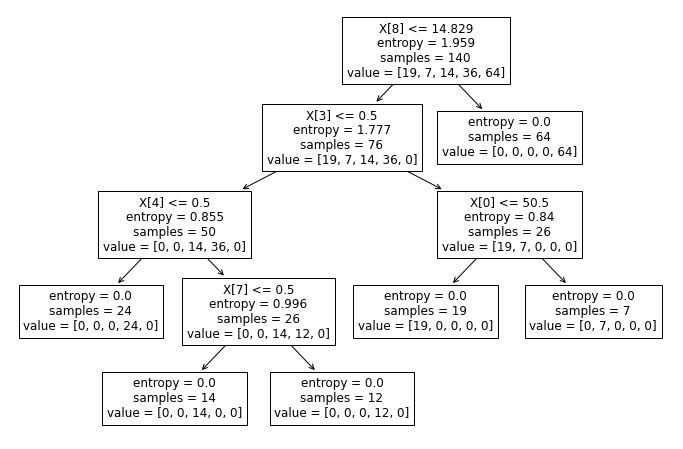

In [28]:
plt.figure(figsize=(12,8))
tree.plot_tree(decision_tree)